### Student Information
Name: 董苡恩

Student ID: 111062317

GitHub ID: MQsparrow

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [273]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\otter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 3. read and inspect data

### read path and check

In [274]:
from pathlib import Path

p = Path("newdataset\Reddit-stock-sentiment.csv")
df = pd.read_csv(p, low_memory=False)

In [275]:
df

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [276]:
# check data
df[0:2]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0


In [277]:
# shape (# of data and # of features)
print(df.shape)

(847, 16)


In [278]:
# look at text data
print("\n".join(df["text"][0].split("\n")))
print("\n".join(df["text"][1].split("\n")))

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


### type, features and categories

In [279]:
print(df["type"].unique())
print(df["type"].value_counts(dropna=False).sort_index())

['comment' 'post']
type
comment    783
post        64
Name: count, dtype: int64


In [280]:
# add type num
df["type_num"] = (df["type"] == "post").astype(int)
print(df["type_num"].unique())
print(df["type_num"].value_counts(dropna=False).sort_index())

[0 1]
type_num
0    783
1     64
Name: count, dtype: int64


In [281]:
# move next to type
cols = df.columns.tolist()
cols.remove("type_num")
cols.insert(1, "type_num") 
df = df[cols]

In [282]:
# label, categories
print(df["label"].unique())
print(df["label"].value_counts(dropna=False).sort_index())

[-1.  0.  1.]
label
-1.0    315
 0.0    423
 1.0    109
Name: count, dtype: int64


In [283]:
print(df["label"][0])

-1.0


In [284]:
df["label"][0]

np.float64(-1.0)

In [285]:
df["label"][0:10]

0   -1.0
1    0.0
2    0.0
3    1.0
4   -1.0
5    0.0
6   -1.0
7    0.0
8    1.0
9    1.0
Name: label, dtype: float64

In [286]:
# features
features = df.columns.tolist()
print(features)

['type', 'type_num', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']


### exercise 1

In [287]:
# exercise 1, look at data
for i in range(3):
    print(f"example {i+1}:")
    for j in features:
        print(f"{j}: {df[j].iloc[i]}")
    print("-" * 40)

example 1:
type: comment
type_num: 0
datetime: 2025-04-11 17:29:56
post_id: mmli62w
subreddit: wallstreetbets
title: Retardation is on the menu boys! WSB is so back
author: StickyTip420
url: https://i.redd.it/0yq2ftren8ue1.jpeg
upvotes: 0
downvotes: nan
upvote_ratio: nan
text: Calls on retards
subjectivity: 1.0
polarity: -0.9
sentiment: -1.0
entities: []
label: -1.0
----------------------------------------
example 2:
type: comment
type_num: 0
datetime: 2025-04-12 1:12:19
post_id: mmnu7v9
subreddit: wallstreetbets
title: Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
author: Comfortable-Dog-8437
url: https://i.redd.it/7tl6puv9waue1.jpeg
upvotes: -15
downvotes: nan
upvote_ratio: nan
text: Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
subjectivity: 0.1777777777777777
polarity: 0.0833333333333333
sentiment: 1.0
entities: ['Stunt', 'company', 'deal

### exercise 3

In [288]:
df[ df["type"] == "post" ][::10][:5]

,type,type_num,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,1,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.64697,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
165,post,1,2025-04-09 14:01:01,1jv6i3y,stockstobuytoday,Established Uptrend,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Stock list generated from technical Analysis. ...,0.10000,0.000000,0.0,"['SMA', 'ta_rsi_nob60', 'ft=2', 'stockbuyvest....",0.0
332,post,1,2025-04-11 18:25:25,1jwwv42,wallstreetbets,$75k+ In Gains (300% YTD),KatBoss01,https://www.reddit.com/gallery/1jwwv42,5,0.0,1.00,"Mostly in MSTR calls, AAPL puts and GBTC long.",0.45000,0.225000,1.0,"['GBTC', 'MSTR', 'AAPL']",1.0
421,post,1,2025-03-31 14:05:30,1jo3zpc,stockstobuytoday,Stock Gainers for Today,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Stocks that are trending up today\r\n\r\n [Pop...,0.00000,0.000000,0.0,"[']', 'Popping', 'stockbuyvest.com', 'today']",0.0
487,post,1,2021-12-25 0:40:59,rnypxo,stockstobuytoday,Deep value vs Dividend!,AnonymusFarmer,https://www.reddit.com/r/stockstobuytoday/comm...,9,0.0,0.91,"Good Morning Investors, \r\n\r\nI am a young F...",0.41903,0.119152,1.0,"['student', 'someone', 'x200B', 'dividend', 'w...",0.0


In [289]:
df[ df["type"] == "comment" ][::10][:5]

,type,type_num,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,0,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.90000,-1.0,[],-1.0
11,comment,0,2025-04-12 2:51:20,mmo9e6r,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,RememberTooSmile,https://www.reddit.com/r/wallstreetbets/commen...,9,NaN,NaN,"this sub has ruined emails for me, whenever I ...",0.300000,1.00000,1.0,"['sub', 'WSB', 'Best']",0.0
21,comment,0,2025-04-06 23:31:33,mls3ha1,stockstobuytoday,If you had $10k in cash…,Either_Breadfruit_90,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,GEO WM,0.000000,0.00000,0.0,"['GEO', 'WM']",0.0
31,comment,0,2024-08-17 5:32:56,liiwbkk,stockstobuytoday,Best EV / green mining stocks?,[deleted],https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,$EVGO \r\n\r\n*Record Revenue increasing 5 str...,0.422268,0.10788,1.0,"['Jeep', 'program', 'spike', '+', 'Honda', 'Eq...",0.0
41,comment,0,2021-05-03 22:17:48,gwu560b,stockstobuytoday,"Shorted Stocks - Hedges crushing NAKD, FAMI, S...",Limp-Project5733,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,And plug,0.000000,0.00000,0.0,['plug'],0.0


## 4. pre process

### excercise 4: check missing values

In [290]:
df.isnull()

,type,type_num,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
845,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False


In [291]:
import helpers.data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,type_num,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


#### downvotes and upvote_ratio missing for comments

there are 783 comments

In [292]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

In [293]:
# filling them with reasonable values instead of dropping them, because these 2 cols are still useful for posts
df['downvotes'] = df['downvotes'].fillna(-1)
df['upvote_ratio'] = df['upvote_ratio'].fillna(-1)

In [294]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,type_num,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [295]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [296]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844    False
845    False
846    False
Length: 847, dtype: bool

### exercise 6: check duplicates

In [297]:
# no dublicate
sum(df.duplicated())

0

#### found 23 pair of data with duplidate text

In [298]:
# text duplcate
sum(df.duplicated('text'))

23

In [299]:
df[df.duplicated('text', keep="last")]

,type,type_num,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
34,comment,0,2021-02-01 13:45:52,gllif2v,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,1,-1.0,-1.0,So they went from saying redditors are bad for...,0.666667,-0.7000,-1.0,"['market', 'silver']",1.0
70,post,1,2025-03-29 18:14:28,1jmshlc,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Updated Daily by EOD\r\n\r\n \r\n[Daily Short...,0.100000,0.0000,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0
105,post,1,2025-04-04 9:01:07,1jr7fe1,stockstobuytoday,World Markets,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,\r\n\r\n [World Markets (stockbuyvest.com)](),0.000000,0.0000,0.0,"[']', 'World', 'stockbuyvest.com', 'Markets']",0.0
159,post,1,2025-04-11 13:54:31,1jwqgce,stockstobuytoday,Gappers (Up/Down),saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Gappers for today\r\n\r\n [Gappers (stockbuyve...,0.000000,0.0000,0.0,"['Gappers', 'stockbuyvest.com', ']', 'today', ...",0.0
160,post,1,2025-04-03 12:18:32,1jqgwyz,stockstobuytoday,Futures Market,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,how does the futures market look today\r\n\r\n...,0.377083,0.0625,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0
179,post,1,2025-03-25 15:47:42,1jjmipo,stockstobuytoday,Dark Pool Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,This data is from FINRA ATS - Updated Weekly\r...,0.000000,0.0000,0.0,"['FINRA', 'data', 'ATS', 'FINRA ATS - Updated'...",0.0
192,post,1,2025-03-21 21:15:20,1jgrs02,stockstobuytoday,Commitment of Trader Report,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"Summarized with Highlights, updated weekly be ...",0.000000,0.0000,0.0,"[']', 'Highlights', 'Report', 'EOW', 'Summary'...",0.0
284,post,1,2025-04-06 16:00:59,1jsxft7,stockstobuytoday,Crypto Gainers - Coinbase,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.000000,0.0000,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",0.0
349,post,1,2025-03-22 18:14:30,1jhestv,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Updated Daily by EOD\r\n\r\n \r\n[Daily Short...,0.100000,0.0000,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0
352,post,1,2025-04-08 12:18:30,1juc5fs,stockstobuytoday,Futures Market,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,how does the futures market look today\r\n\r\n...,0.377083,0.0625,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0


In [300]:
df[df.duplicated('text')]

,type,type_num,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
42,comment,0,2021-02-01 13:45:17,gllicpw,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,3943,-1.0,-1.0,So they went from saying redditors are bad for...,0.666667,-0.7000,-1.0,"['market', 'silver']",1.0
349,post,1,2025-03-22 18:14:30,1jhestv,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Updated Daily by EOD\r\n\r\n \r\n[Daily Short...,0.100000,0.0000,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0
352,post,1,2025-04-08 12:18:30,1juc5fs,stockstobuytoday,Futures Market,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,how does the futures market look today\r\n\r\n...,0.377083,0.0625,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0
387,post,1,2025-03-24 15:47:30,1jituo3,stockstobuytoday,Dark Pool Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,This data is from FINRA ATS - Updated Weekly\r...,0.000000,0.0000,0.0,"['FINRA', 'data', 'ATS', 'FINRA ATS - Updated'...",0.0
432,post,1,2025-04-11 16:01:14,1jwtejt,stockstobuytoday,Crypto Gainers - Coinbase,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.000000,0.0000,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",0.0
438,post,1,2025-03-25 21:15:31,1jjukvz,stockstobuytoday,Commitment of Trader Report,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"Summarized with Highlights, updated weekly be ...",0.000000,0.0000,0.0,"[']', 'Highlights', 'Report', 'EOW', 'Summary'...",0.0
462,post,1,2025-04-11 15:47:01,1jwt2cq,stockstobuytoday,Dark Pool Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,This data is from FINRA ATS - Updated Weekly\r...,0.000000,0.0000,0.0,"['FINRA', 'data', 'ATS', 'FINRA ATS - Updated'...",0.0
473,post,1,2025-03-28 12:18:29,1jltpwb,stockstobuytoday,Futures Market,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,how does the futures market look today\r\n\r\n...,0.377083,0.0625,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0
520,post,1,2025-03-25 18:14:13,1jjq3m5,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Updated Daily by EOD\r\n\r\n \r\n[Daily Short...,0.100000,0.0000,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0
541,post,1,2025-03-31 15:20:30,1jo5plj,stockstobuytoday,Threshold Securities -aka Naked Shorts,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,\r\n\r\n [Threshold (stockbuyvest.com)]() \r\n...,0.000000,0.0000,0.0,"['INTC', 'NVDA', 'GME', 'CVNA', 'Threshold', '...",0.0


#### upvote value differs, so it's probably just repost or replay, not dropping

In [301]:
# any other feature is same other than text?
d1 = df[df.duplicated('text', keep='last')].copy()
d2 = df[df.duplicated('text')].copy()

if len(d1) != len(d2):
    print("len mismatch:", len(d1), len(d2))

d1s = d1.sort_values('text').reset_index(drop=True)
d2s = d2.sort_values('text').reset_index(drop=True)

for col in df.columns:
    same = pd.Series(d1s[col]).equals(pd.Series(d2s[col]))
    print(f"{col} is: {same}")


type is: True
type_num is: True
datetime is: False
post_id is: False
subreddit is: True
title is: True
author is: True
url is: False
upvotes is: False
downvotes is: True
upvote_ratio is: True
text is: True
subjectivity is: True
polarity is: True
sentiment is: True
entities is: True
label is: True


## 5. sampling

In [302]:
X_sample = df.sample(n=400)
print(len(X_sample))
X_sample[0:4]

400


,type,type_num,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
538,comment,0,2025-04-11 22:04:52,mmmzh50,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,brbcryinginside,https://www.reddit.com/r/wallstreetbets/commen...,16,-1.0,-1.00,I started applying to jobs in Germany. Hopeful...,0.000000,0.000000,0.0,"['Hopefully', 'Germany']",0.0
134,post,1,2021-06-21 23:49:22,o590v2,stockstobuytoday,GSAT MOONING???,Jimenezmf777,https://www.reddit.com/r/stockstobuytoday/comm...,11,0.0,0.92,"Word on the street, new price target 3+?\r\n\r...",0.454545,0.136364,1.0,"['street', 'price', 'Word', '/', 'target']",0.0
357,comment,0,2025-04-11 16:39:30,mml7t1g,wallstreetbets,[IPO] AIRO IPO: Aerospace & Defense Play at $1...,johndsmits,https://i.redd.it/n22xlqjix7ue1.jpeg,2,-1.0,-1.00,"It's a holdings company like RCAT, UMUS, etc.....",0.338095,0.255952,1.0,"['momentum', 'emote|t5_2th52|4267', 'IP', 'RCA...",0.0
281,comment,0,2025-04-11 6:28:59,mmit15q,StockMarket,Data Shows US Allies—Not China—Dumping Treasuries,A_Concerned_Viking,https://i.redd.it/31r650bss4ue1.jpeg,1,-1.0,-1.00,What are we gonna call it when Wendy's is gone.,0.000000,0.000000,0.0,['Wendy'],0.0


### exercise 6

In [303]:
print("0. the set size is different: ") # just a subset of X
print(len(df))
print(len(X_sample))

print("1. order of the samplings are shuffled: ") # randomly sampled, not in increasing manner too
print(df[0:4])
print(X_sample[0:4])

print("2. ratio of each category differs: ") # if sample size up, might differ less
print(df["label"].value_counts(normalize=True).sort_index())
print(X_sample["label"].value_counts(normalize=True).sort_index())

0. the set size is different: 
847
400
1. order of the samplings are shuffled: 
      type  type_num             datetime  post_id         subreddit  \
0  comment         0  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment         0   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment         0  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post         1  2023-08-30 17:12:55  165kllm  stockstobuytoday   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0       -1.0   
1               

### sample vs. original data

In [304]:
import matplotlib.pyplot as plt
%matplotlib inline

In [305]:
categories = list(df["label"].unique())
categories

[np.float64(-1.0), np.float64(0.0), np.float64(1.0)]

#### exercise 7

label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='label'>

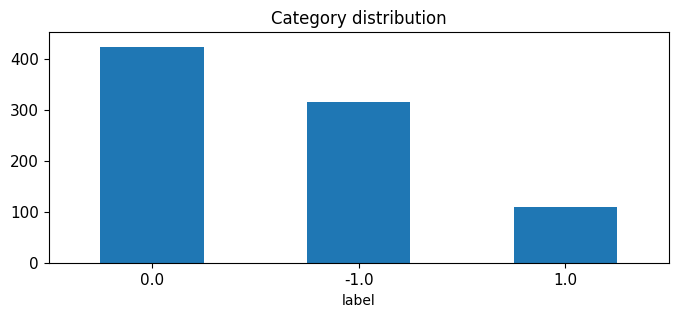

In [306]:
print(df.label.value_counts())

# plot barchart for X
df.label.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, df.label.value_counts().max() + 30],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

label
 0.0    207
-1.0    137
 1.0     56
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='label'>

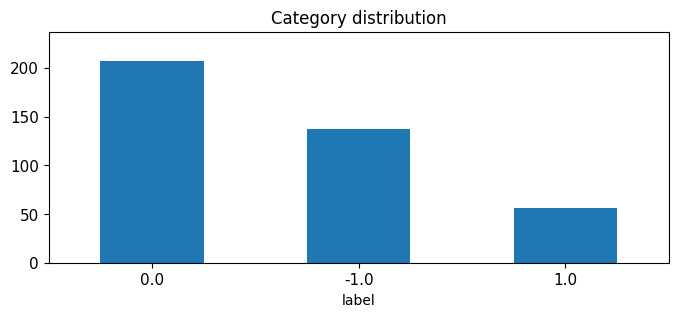

In [307]:
print(X_sample.label.value_counts())

# plot barchart for X
X_sample.label.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, X_sample.label.value_counts().max() + 30],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

#### exercise 8

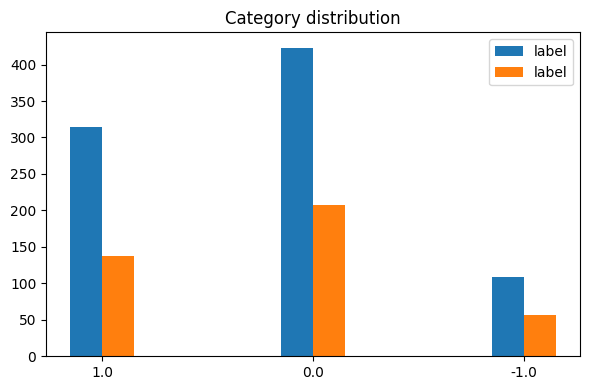

In [308]:
# Answer here
# cat count
orig = df["label"].value_counts().sort_index()
samp = X_sample["label"].value_counts().sort_index()

# cat lable
cat = sorted(set(df["label"]) | set(X_sample["label"]))
cat.reverse()
orig = orig.reindex(categories, fill_value=0)
samp = samp.reindex(categories, fill_value=0)

# plot
x = np.arange(len(categories))  # cat pos
width = 0.15  # bar width

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(x - width/2, orig, width, label="label")
rects2 = ax.bar(x + width/2, samp, width, label="label")

# title + lable
ax.set_title("Category distribution")
ax.set_xticks(x)
ax.set_xticklabels(cat, rotation=0)
ax.legend()

plt.tight_layout()
plt.show()


### feature create

In [309]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\otter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\otter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [310]:
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [311]:
df[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [312]:
list(df[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

### feature subset

In [313]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1


In [314]:
count_vect.get_feature_names_out()[2706]

'on'

In [315]:
count_vect.get_feature_names_out()[3248]

'retards'

##### exercise 9

In [316]:
analyze = count_vect.build_analyzer()
analyze(df.text[0])

['calls', 'on', 'retards']

In [317]:
X_counts.shape

(847, 4346)

In [318]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [319]:
X_counts[5:10, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

##### exercise 10

In [320]:
# the 1 in set 9
cols = sorted(X_counts[9, 0:100].nonzero()[0])
count_vect.get_feature_names_out()[cols[0]]

'00'

##### seaborn

In [321]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

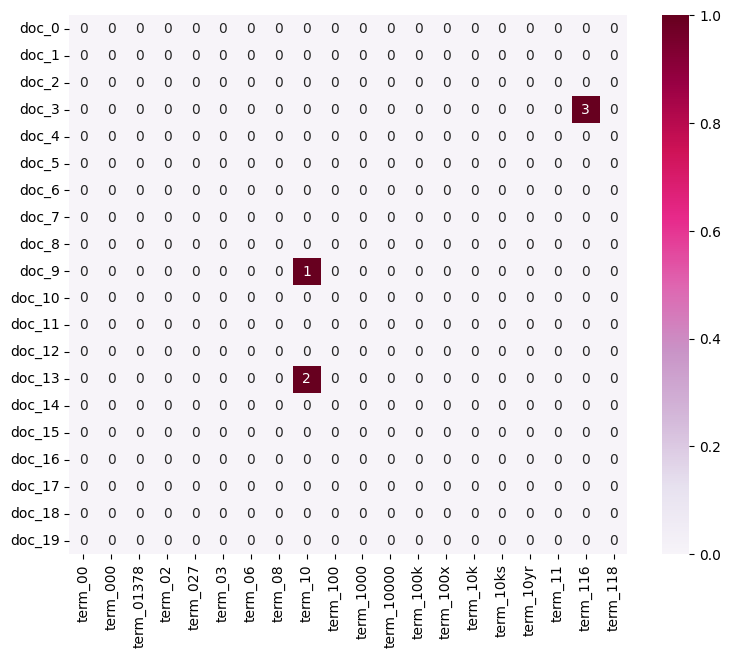

In [322]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

##### exercise 11

In [324]:
# Answer here
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans

count_vect2 = CountVectorizer(min_df=0.01, max_df=0.9, stop_words="english")
X_counts2 = count_vect2.fit_transform(df.text)
print(X_counts.shape)
print(X_counts2.shape)

term_freq = np.asarray(X_counts2.sum(axis=0)).ravel()
top_idx = term_freq.argsort()[-20:][::-1]
top_terms = count_vect2.get_feature_names_out()[top_idx]
print(top_idx)
print(top_terms)

(847, 4346)
(847, 172)
[ 88  70 147  74  19 142 127  99  52  92  55 137 105  86 143 155  40  38
 125  25]
['market' 'just' 'trump' 'like' 'china' 'think' 'stock' 'people' 'going'
 'money' 'good' 'tariffs' 'price' 'make' 'time' 'want' 'don' 'doing'
 'silver' 'company']


In [331]:
tfidf = TfidfTransformer(norm="l2", use_idf=True)
X_tfidf = tfidf.fit_transform(X_counts2)

k = 20
km = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = km.fit_predict(X_tfidf)

In [332]:
M_top = X_tfidf[:, top_idx].toarray()
df_top = pd.DataFrame(M_top, columns=top_terms).assign(cluster=labels)

cluster_mean = df_top.groupby("cluster").mean()
cluster_sizes = df_top["cluster"].value_counts().sort_index()
cluster_mean.index = [
    f"cluster_{c} (n={cluster_sizes[c]})" for c in cluster_mean.index
]

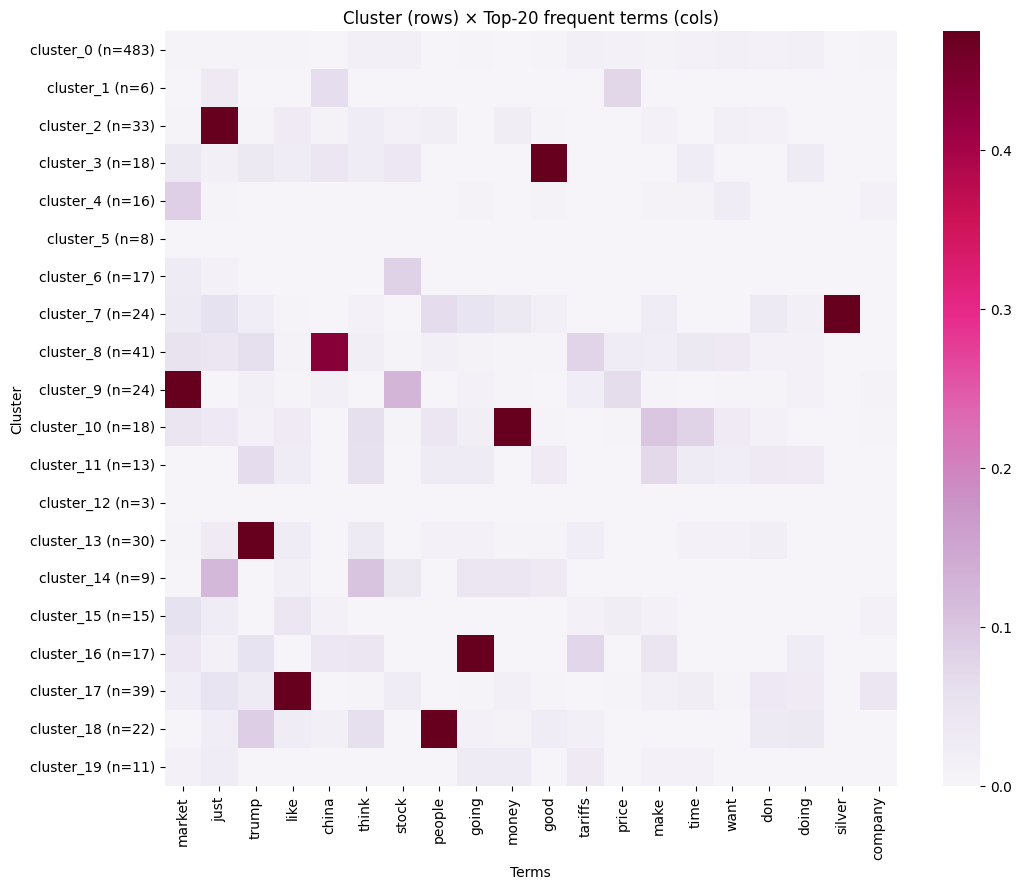

In [333]:
plt.figure(figsize=(11, 9))
sns.heatmap(cluster_mean, cmap="PuRd", robust=True)
plt.title("Cluster (rows) × Top-20 frequent terms (cols)")
plt.xlabel("Terms")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

In [340]:
c0_idx = np.where(labels == 0)[0]
c0_counts = X_counts2[c0_idx].sum(axis=0).A1
top_idx_c0 = c0_counts.argsort()[-20:][::-1]
top_terms_c0 = count_vect2.get_feature_names_out()[top_idx_c0]
print("Cluster 0 top-20 terms:", top_terms_c0)

Cluster 0 top-20 terms: ['think' 'want' 'tariffs' 'don' 'doing' 'time' 'market' 'right' 'dollar'
 '10' 'trump' 'make' 'president' 'buy' 'know' 'just' 'day' 'price'
 'company' 'point']


In [341]:
X_c0 = X_tfidf[c0_idx]
df_c0 = df.iloc[c0_idx].reset_index(drop=True)

In [342]:
k = 20
c0_km = KMeans(n_clusters=k, n_init=10, random_state=42)
c0_labels = c0_km.fit_predict(X_c0)

In [343]:
c0_M_top = X_c0[:, top_idx_c0].toarray()
c0_df_top = pd.DataFrame(c0_M_top, columns=top_terms_c0).assign(cluster=c0_labels)

c0_cluster_mean = c0_df_top.groupby("cluster").mean()
c0_cluster_sizes = c0_df_top["cluster"].value_counts().sort_index()
c0_cluster_mean.index = [
    f"c0_cluster_{c} (n={c0_cluster_sizes[c]})" for c in c0_cluster_mean.index
]

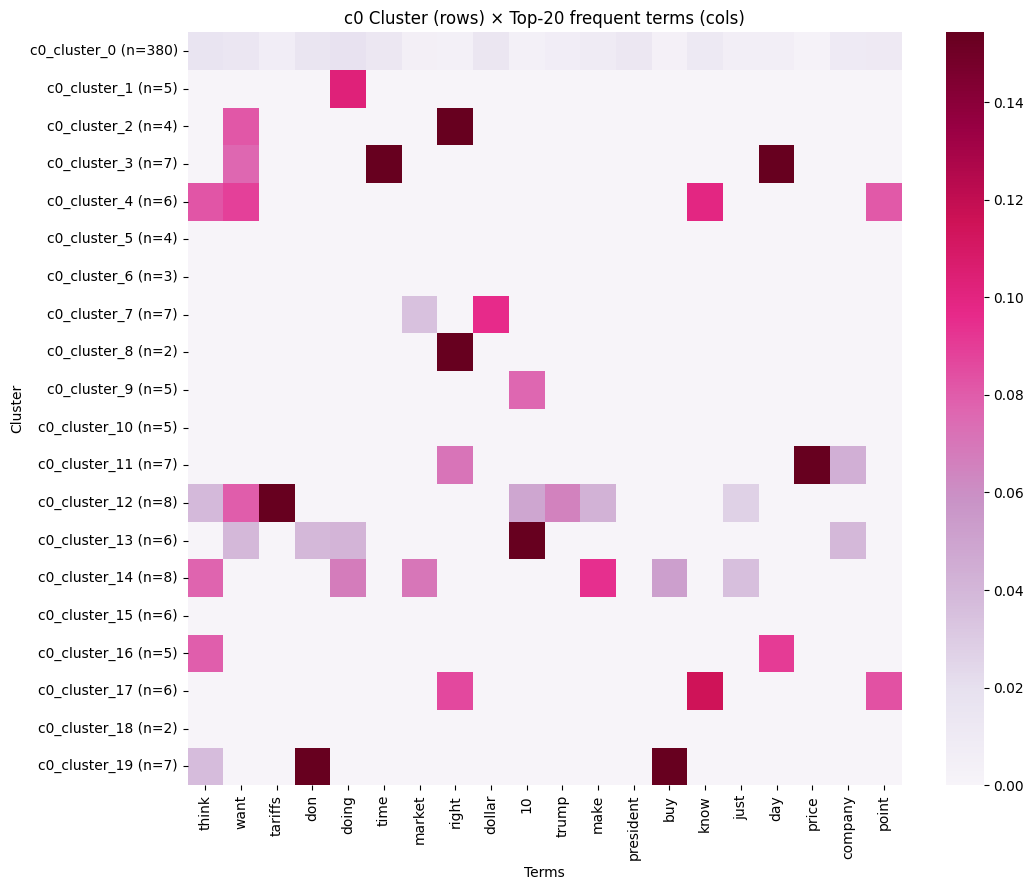

In [344]:
plt.figure(figsize=(11, 9))
sns.heatmap(c0_cluster_mean, cmap="PuRd", robust=True)
plt.title("c0 Cluster (rows) × Top-20 frequent terms (cols)")
plt.xlabel("Terms")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

### Attribute Transformation / Aggregation

In [345]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [346]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

np.int64(4)

C:\Users\otter\AppData\Local\Temp\ipykernel_22960\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


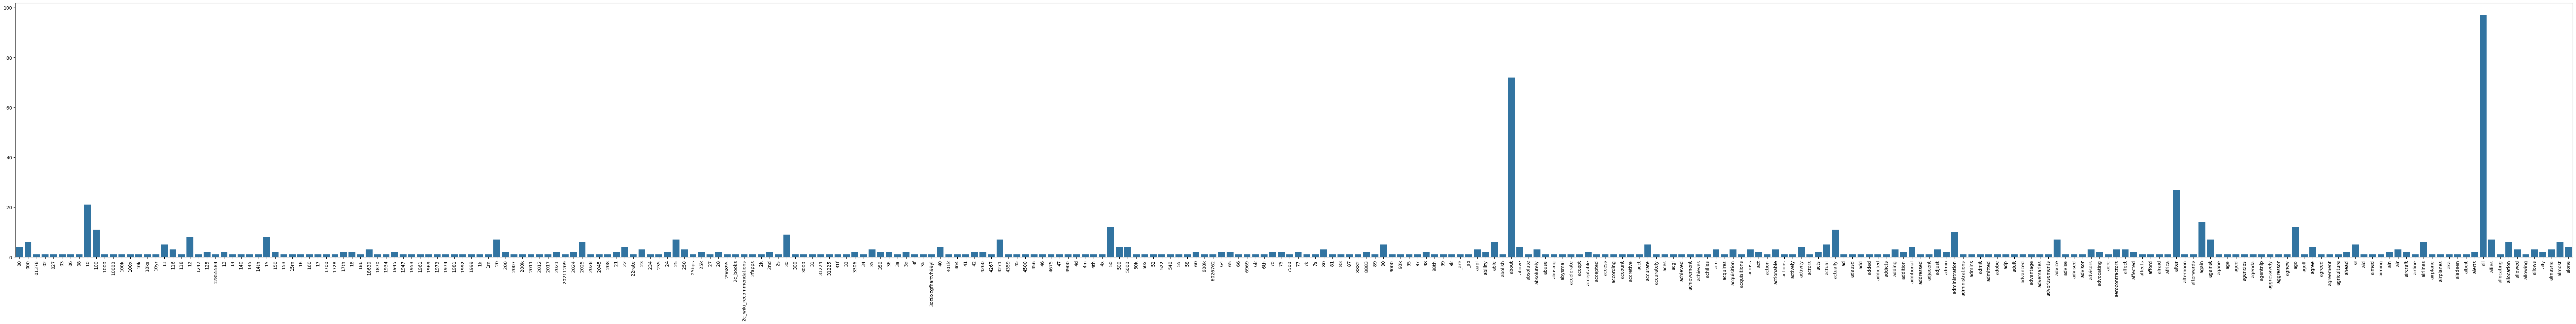

In [347]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [348]:
# Answer here
import plotly.express as px

df = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300]
})

fig = px.bar(df, x="term", y="frequency",
             title="first-300 Term Frequencies",
             labels={"term": "Term", "frequency": "Frequency"})

fig.update_layout(
    xaxis_tickangle=-90,
    width=1400,
    height=500
)

fig.show()


In [351]:
# Answer here
df = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies
})

# threshold
threshold = 100
df_filtered = df[df["frequency"] >= threshold]

fig = px.bar(df_filtered,
             x="term", y="frequency",
             title=f"Terms with frequency ≥ {threshold}",
             labels={"term": "Term", "frequency": "Frequency"})

fig.update_layout(
    xaxis_tickangle=-90,
    width=1200,
    height=500
)

fig.show()

In [352]:
# Answer here
terms = count_vect.get_feature_names_out()
sorted_idx = term_frequencies.argsort()[::-1]
sorted_terms = terms[sorted_idx]
sorted_freqs = term_frequencies[sorted_idx]
# print(sorted_terms[:20])
# print(sorted_freqs[:20])

df = pd.DataFrame({
    "term": sorted_terms[:300],
    "frequency": sorted_freqs[:300]
})

fig = px.bar(df, x="term", y="frequency",
             title="top-300 Term Frequencies",
             labels={"term": "Term", "frequency": "Frequency"})

fig.update_layout(
    xaxis_tickangle=-90,
    width=1400,
    height=500
)

fig.show()


In [353]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\otter\AppData\Local\Temp\ipykernel_22960\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



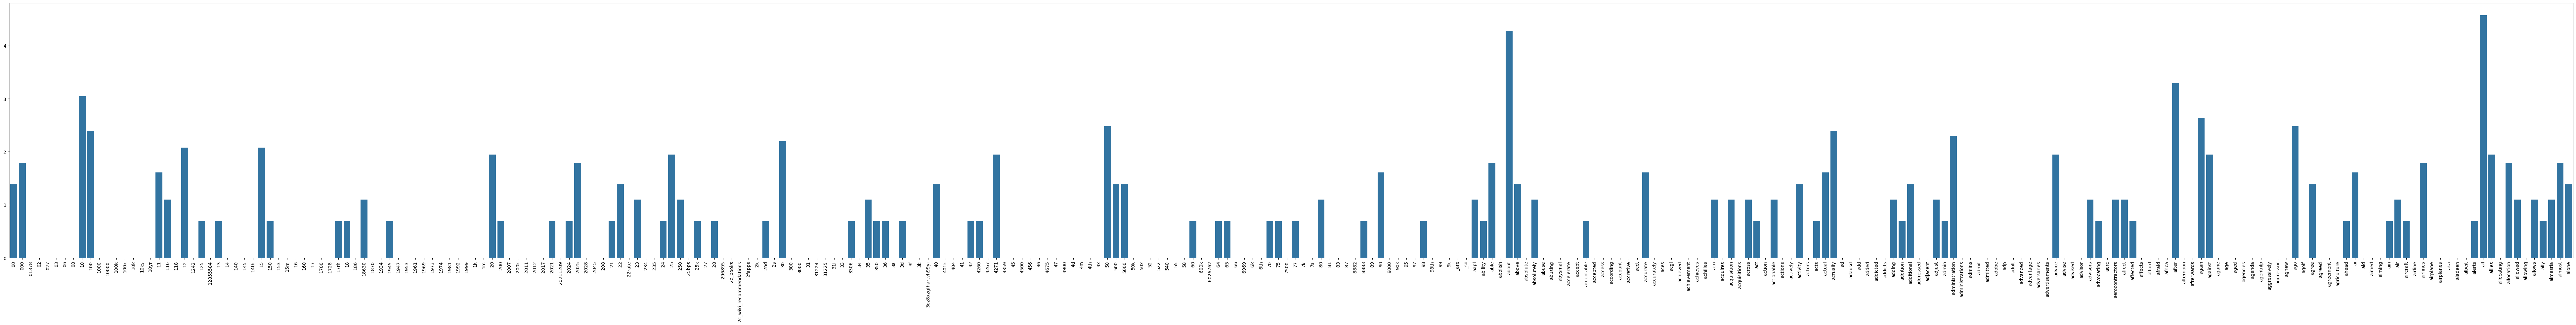

In [354]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [356]:
# Answer here
df = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies_log
})

# threshold
threshold = 3
df_filtered = df[df["frequency"] >= threshold]

fig = px.bar(df_filtered,
             x="term", y="frequency",
             title=f"Terms with frequency ≥ {threshold}",
             labels={"term": "Term", "frequency": "Frequency"})

fig.update_layout(
    xaxis_tickangle=-90,
    width=1200,
    height=500
)

fig.show()

# Answer here
terms = count_vect.get_feature_names_out()
term_frequencies_log = np.log1p(term_frequencies)
sorted_idx = term_frequencies_log.argsort()[::-1]
sorted_terms = terms[sorted_idx]
sorted_freqs = term_frequencies_log[sorted_idx]
# print(sorted_terms[:20])
# print(sorted_freqs[:20])

df = pd.DataFrame({
    "term": sorted_terms[:1000],
    "frequency": sorted_freqs[:1000]
})

fig = px.bar(df, x="term", y="frequency",
             title="top-1000 Term Frequencies",
             labels={"term": "Term", "frequency": "Frequency"})

fig.update_layout(
    xaxis_tickangle=-90,
    width=1400,
    height=500
)

fig.show()

# Phase 2

In [323]:
### Begin Assignment Here